# Actividad: Completar Pandas 3
---


***Estudiante:  Jessica Briseño                Fecha: Marzo 2024***

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [ ]:
# pandas usando el alias pd
import pandas as pd

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  10.4M      0 --:--:-- --:--:-- --:--:-- 10.4M


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [ ]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [ ]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [ ]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [ ]:
m,n = fifa_df.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 18207
Columnas: 21


In [ ]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [ ]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes.

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [ ]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,...,60,0,0,48,48,48,48,48,48,48


In [ ]:
fifa_df.isna()


,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [ ]:
t_df = fifa_df.dropna(axis=0, how="any")
t_df.shape

(17918, 21)

Verifica que no hay más datos faltantes:

In [ ]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [ ]:
fifa_df = t_df
fifa_df.shape

(17918, 21)

### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis.

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones).

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [ ]:
fifa_df[["Wage"]]

,Wage
0,€565K
1,€405K
2,€290K
3,€260K
4,€355K
...,...
18202,€1K
18203,€1K
18204,€1K
18205,€1K


In [ ]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [ ]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [ ]:
def currency_to_numeric(cadena):        #Versión dato por dato JB

  # el multiplo de K o M
  #symbols = {"K": 1000, "M": 1000000}
  # Actualiza el valor de numeric con la cantidad en currency
  #numeric = 0.0
  NumFin=0
  Evaluar_K_M=cadena[-1]

  #Numero=(cadena[1:-1])
  if Evaluar_K_M != "K" and Evaluar_K_M != "M":
      Numero=(cadena[1:])
      NumFin=float(Numero)
  elif Evaluar_K_M == "K":
     Numero=(cadena[1:-1])
     NumFin=float(Numero)*1000
  elif Evaluar_K_M == "M":
      Numero=(cadena[1:-1])
      NumFin=float(Numero)*1000000

  #NumFinn = str(NumFin)
  return NumFin


Prueba tu función:

In [ ]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [ ]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)


In [ ]:
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador.


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   4477      0 --:--:-- --:--:-- --:--:--  4488


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [ ]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


In [ ]:
positions_df.shape

(36, 2)

In [ ]:
positions_df.rename(columns={"Abbreviation":"Position"},
               inplace=True)


In [ ]:
positions_df.head()

,Position,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [ ]:
merged_df = fifa_df.merge(positions_df,how="inner",on="Position")

In [ ]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,Right Forward
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,Right Forward
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,Right Forward


In [ ]:
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [ ]:
merged_df["Position"] = merged_df["Position"].str.cat(merged_df["Full"],sep=" ")

In [ ]:
merged_df["Position"]

0          RF Right Forward
1          RF Right Forward
2          RF Right Forward
3          RF Right Forward
4          RF Right Forward
                ...        
17913    LWB Left Wing Back
17914    LWB Left Wing Back
17915    LWB Left Wing Back
17916    LWB Left Wing Back
17917    LWB Left Wing Back
Name: Position, Length: 17918, dtype: object

In [ ]:
merged_df.Position.unique()

array(['RF Right Forward', 'ST Striker', 'LW Left Wing', 'GK Goalkeeper',
       'RCM Right Center Midfield', 'LF Left Forward', 'RS Right Side',
       'RCB Right Center Back', 'LCM Left Center Midfield',
       'CB Center Back', 'LDM Left Defensive Midfielder',
       'CAM Central Attacking Midfielder',
       'CDM Central Defensive Midfielder', 'LS Left Side',
       'LCB Left Center Back', 'RM Right Midfielder',
       'LAM Left Attacking Midfielder', 'LM Left Midfielder',
       'LB Left Back', 'RDM Right Defensive Midfielder', 'RW Right Wing',
       'CM Central Midfield', 'RB Right Back',
       'RAM Right Attacking Midfielder', 'CF Center Forward',
       'RWB Right Wing Back', 'LWB Left Wing Back'], dtype=object)

Muestra la columna actualizada:

In [ ]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,Right Forward
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,Right Forward
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,Right Forward


Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [ ]:
merged_df = merged_df.drop(["Full"], axis=1)     #merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [ ]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF Right Forward,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,RF Right Forward,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,RF Right Forward,80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0


In [ ]:
merged_df.shape

(17918, 21)

In [ ]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [ ]:
fifa_df = merged_df
fifa_df.head(2)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF Right Forward,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,RF Right Forward,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0


In [ ]:
fifa_df.shape

(17918, 21)

## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [ ]:
fifa_df[["Name", "Club", "Value"]].sort_values("Value",ascending=False).head(3)

,Name,Club,Value
2146,Neymar Jr,Paris Saint-Germain,118500000.0
0,L. Messi,FC Barcelona,110500000.0
4512,K. De Bruyne,Manchester City,102000000.0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [ ]:
fifa_df[["Name", "Club", "Wage"]].sort_values("Wage",ascending=False).head(3)

,Name,Club,Wage
0,L. Messi,FC Barcelona,565000.0
4914,L. Suárez,FC Barcelona,455000.0
4513,L. Modrić,Real Madrid,420000.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [ ]:
fifa_df["Potential left"] = fifa_df["Potential"]-fifa_df["Overall"]    # <rellena>
fifa_df.shape


(17918, 22)

In [ ]:
fifa_df[["Name", "Club", "Potential left"]].head(10)

,Name,Club,Potential left
0,L. Messi,FC Barcelona,0
1,D. Mertens,Napoli,0
2,D. Valeri,Portland Timbers,0
3,L. Podolski,Vissel Kobe,0
4,C. Ciano,Frosinone,0
5,P. Gerkens,RSC Anderlecht,5
6,Zhang Xizhe,Beijing Sinobo Guoan FC,0
7,C. Falletti,Palermo,3
8,Rafa Mir,UD Las Palmas,11
9,H. Yamada,Júbilo Iwata,0


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [ ]:
fifa_dfMen22=fifa_df[fifa_df["Age"]<22].sort_values(["Potential","Potential left", "Overall"],ascending = [False,False, False]).head(5)

In [ ]:
fifa_dfMen22[["Name", "Club","Age", "Potential", "Potential left", "Overall"]]


,Name,Club,Age,Potential,Potential left,Overall
10876,K. Mbappé,Paris Saint-Germain,19,95,7,88
2553,G. Donnarumma,Milan,19,93,11,82
2170,Vinícius Júnior,Real Madrid,17,92,15,77
31,Gabriel Jesus,Manchester City,21,92,9,83
14654,O. Dembélé,FC Barcelona,21,92,9,83


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [ ]:
fifa_df["Position"].unique()

array(['RF Right Forward', 'ST Striker', 'LW Left Wing', 'GK Goalkeeper',
       'RCM Right Center Midfield', 'LF Left Forward', 'RS Right Side',
       'RCB Right Center Back', 'LCM Left Center Midfield',
       'CB Center Back', 'LDM Left Defensive Midfielder',
       'CAM Central Attacking Midfielder',
       'CDM Central Defensive Midfielder', 'LS Left Side',
       'LCB Left Center Back', 'RM Right Midfielder',
       'LAM Left Attacking Midfielder', 'LM Left Midfielder',
       'LB Left Back', 'RDM Right Defensive Midfielder', 'RW Right Wing',
       'CM Central Midfield', 'RB Right Back',
       'RAM Right Attacking Midfielder', 'CF Center Forward',
       'RWB Right Wing Back', 'LWB Left Wing Back'], dtype=object)

In [ ]:
Cond_LDM=fifa_df["Position"]=="LDM Left Defensive Midfielder"
Cond_RDM=fifa_df["Position"]=="RDM Right Defensive Midfielder"

fifa_df[Cond_LDM | Cond_RDM]

fifa_dfMen_LDM_RDM=fifa_df[Cond_LDM | Cond_RDM]

fifa_dfMen_LDM_RDM[["Name", "Club","Position","Defense"]].sort_values("Defense",ascending=False).head(5)

,Name,Club,Position,Defense
7910,N. Kanté,Chelsea,LDM Left Defensive Midfielder,86.0
14404,I. Gueye,Everton,RDM Right Defensive Midfielder,82.0
7919,W. Ndidi,Leicester City,LDM Left Defensive Midfielder,80.0
14406,M. Parolo,Lazio,RDM Right Defensive Midfielder,80.0
14403,Illarramendi,Real Sociedad,RDM Right Defensive Midfielder,80.0


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [ ]:
fifa_df["Preferred Foot"].unique()
fifa_df["Preferred Foot"].value_counts(ascending=True)

Left      4162
Right    13756
Name: Preferred Foot, dtype: int64

In [ ]:
PiePref=fifa_df["Preferred Foot"].value_counts(ascending=True)

print("Pie Izquierdo preferido =",PiePref[0]/(PiePref[0]+PiePref[1])*100, "%")
print("Pie derecho preferido =",PiePref[1]/(PiePref[0]+PiePref[1])*100, "%")

Pie Izquierdo preferido = 23.22803884362094 %
Pie derecho preferido = 76.77196115637906 %


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [ ]:
fifa_df.groupby("Club")["Overall"].mean().sort_values(ascending=False).head(10)

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
Name: Overall, dtype: float64

### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [ ]:
fifa_df.groupby('Club')['Value'].sum().sort_values(ascending=False)

Club
Real Madrid          874425000.0
FC Barcelona         852600000.0
Manchester City      786555000.0
Juventus             704475000.0
FC Bayern München    679025000.0
                        ...     
Sligo Rovers           3295000.0
Bohemian FC            3195000.0
Derry City             2795000.0
Limerick FC            2040000.0
Bray Wanderers         1930000.0
Name: Value, Length: 651, dtype: float64

### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [ ]:
players_mx_df=fifa_df[fifa_df["Nationality"]=="Mexico"]

In [ ]:
players_mx_df.groupby('Club')['Value'].count().sort_values(ascending=False).head(5)

Club
Guadalajara    29
U.N.A.M.       21
Club Atlas     20
Club Necaxa    20
Querétaro      19
Name: Value, dtype: int64

Agrupa por el nombre del club y cuenta:

## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

<Axes: >

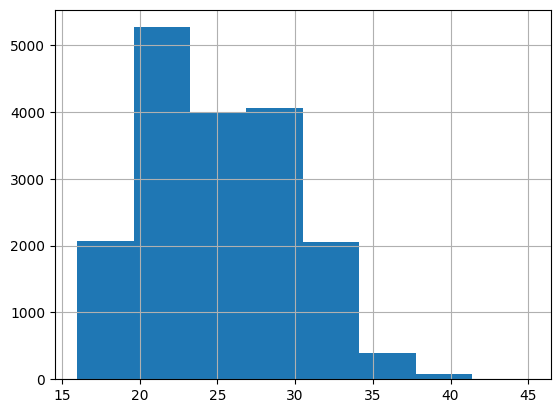

In [ ]:
# <rellena>.plot.hist(bins=10)

fifa_df["Age"].hist(bins=8)


### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

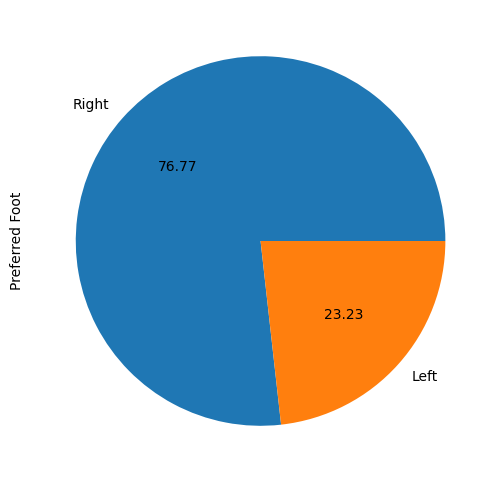

In [ ]:
# <completa>.plot.pie()

plot = fifa_df["Preferred Foot"].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='')


### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

<Axes: xlabel='Age', ylabel='Potential left'>

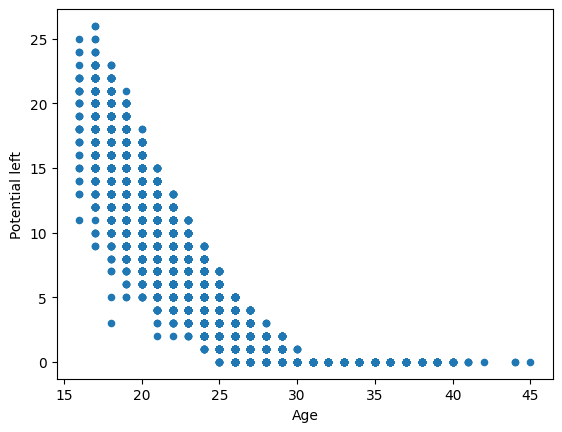

In [ ]:
# <completa>.plot.scatter(<completa>)

fifa_df.plot.scatter(x="Age",y="Potential left")

¿Qué otras variables o mezcla de variables sería interesante visualizar?

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades?

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```

* ```JB. Generación de números aleatorios con distribución binomial con media=0.80, para seleccionar el 80% como datos de entrenamiento y el otro 20% como datos de prueba.```

In [ ]:
import numpy as np

df_Modelo=fifa_df[["Position","Shooting","Defense","Passing","Physical","Control","Mental","GoalKeeping"]]

Aleatorio_80_np = np.random.binomial(n=1, p=0.8, size=fifa_df.shape[0])
Aleatorio_80_pd=pd.DataFrame(Aleatorio_80_np,columns=["Aleatorio_80"])

df_Modelo["Aleatorio_80"] = Aleatorio_80_pd["Aleatorio_80"]    # <rellena>

df_Modelo[["Aleatorio_80"]].groupby(df_Modelo.Aleatorio_80).count()

<ipython-input-56-8bc3d206a8c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Modelo["Aleatorio_80"] = Aleatorio_80_pd["Aleatorio_80"]    # <rellena>


,Aleatorio_80
Aleatorio_80,
0,3614
1,14304


In [ ]:
ValoresAle=df_Modelo["Aleatorio_80"].groupby(df_Modelo.Aleatorio_80).count()

print(ValoresAle[0]/df_Modelo.shape[0]*100,"%  de valores de Prueba")
print(ValoresAle[1]/df_Modelo.shape[0]*100,"%  de valores de Entrenamiento")

20.169661792610782 %  de valores de Prueba
79.83033820738922 %  de valores de Entrenamiento


# Set de Prueba: 20% de los datos    

**x_Prueba_np   = matriz con datos de prueba de skill de jugadores**



In [ ]:
df_Set_Prueba=df_Modelo[df_Modelo["Aleatorio_80"]==0]
df_Set_Prueba =df_Set_Prueba.drop(["Aleatorio_80"], axis=1)    #Borrando columna numeros aleatorios
x_Prueba=df_Set_Prueba.iloc[:, 1:9]
x_Prueba_np=x_Prueba.to_numpy()
x_Prueba_np.shape


(3614, 7)

In [ ]:
y_real_Prueba=df_Set_Prueba["Position"]
y_real_Prueba_np=y_real_Prueba.to_numpy()
y_real_Prueba_np.shape

(3614,)

#Set de Entrenamiento: 80% de los datos

1.   **y_Media_Entre_np** = Matriz con media de cada skills y de cada Posición (1 al 27)
2. **y_real_entrenamiento_np**  = Vector con datos entrenamiento de Posiciones
3. **x_Entrenamiento_np**      = Matriz con datos entrenamiento de skills



In [ ]:
#Set de entrenamient0
df_Set_Entrenamiento=df_Modelo[df_Modelo["Aleatorio_80"]==1]
df_Set_Entrenamiento =df_Set_Entrenamiento.drop(["Aleatorio_80"], axis=1)
#df_Set_Entrenamiento["Position"].value_counts(ascending=True)

In [ ]:
y_Media_Entre=df_Set_Entrenamiento.groupby("Position")["Shooting","Defense","Passing","Physical","Control","Mental","GoalKeeping"].mean()

<ipython-input-61-f0d4ac41db2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_Media_Entre=df_Set_Entrenamiento.groupby("Position")["Shooting","Defense","Passing","Physical","Control","Mental","GoalKeeping"].mean()


In [ ]:
y_Media_Entre_np=y_Media_Entre.to_numpy()
y_Media_Entre_np.shape

(27, 7)

In [ ]:
x_Entrenamiento=df_Set_Entrenamiento.iloc[:, 1:9]
x_Entrenamiento_np=x_Entrenamiento.to_numpy()
x_Entrenamiento_np.shape

(14304, 7)

In [ ]:
y_real_entrenamiento=df_Set_Entrenamiento["Position"]
y_real_entrenamiento_np=y_real_entrenamiento.to_numpy()
y_real_entrenamiento_np.shape

(14304,)

In [ ]:
y_real_entrenamiento_np

array(['RF Right Forward', 'RF Right Forward', 'RF Right Forward', ...,
       'LWB Left Wing Back', 'LWB Left Wing Back', 'LWB Left Wing Back'],
      dtype=object)

# Cálculo de la Estimación y Exactitud del modelo (Set Entrenamiento)

con:
1.   **y_Media_Entre_np** = Matriz con media de cada skills y de cada Posición (1 al 27)
2. **y_real_entrenamiento_np**  = Vector con datos entrenamiento de Posiciones
3. **x_Entrenamiento_np**      = Matriz con datos entrenamiento de skills

se calcula:
1. **y_pred** = Estimación de la posición calculada en base al método de la dist

2. **Excactitud del modelo con datos entrenamiento** == Aprox 30%

In [ ]:
import math

def euclidean_distance(P, Q):
  diff = np.square(P-Q)
  sum=np.sum(diff)
  e_distance=np.sqrt(sum)
  return e_distance


def accuracy(y, y_pred):   #Devuelve la exactitud dados dos vectores "y" con la verdad y "y_pred" con las predicciones
   acc=np.sum(np.equal(y_pred, y))/len(y_pred)
   return acc

In [ ]:
NombrePosiciones=fifa_df["Position"].unique()
NombrePosiciones=np.sort(NombrePosiciones)
NombrePosiciones

array(['CAM Central Attacking Midfielder', 'CB Center Back',
       'CDM Central Defensive Midfielder', 'CF Center Forward',
       'CM Central Midfield', 'GK Goalkeeper',
       'LAM Left Attacking Midfielder', 'LB Left Back',
       'LCB Left Center Back', 'LCM Left Center Midfield',
       'LDM Left Defensive Midfielder', 'LF Left Forward',
       'LM Left Midfielder', 'LS Left Side', 'LW Left Wing',
       'LWB Left Wing Back', 'RAM Right Attacking Midfielder',
       'RB Right Back', 'RCB Right Center Back',
       'RCM Right Center Midfield', 'RDM Right Defensive Midfielder',
       'RF Right Forward', 'RM Right Midfielder', 'RS Right Side',
       'RW Right Wing', 'RWB Right Wing Back', 'ST Striker'], dtype=object)

In [ ]:
if __name__ == '__main__':    #####   NOta: Requiero optimizar este código   ####

    keys = ['CAM Central Attacking Midfielder','CB Center Back','CDM Central Defensive Midfielder',
           'CF Center Forward','CM Central Midfield','GK Goalkeeper','LAM Left Attacking Midfielder',
           'LB Left Back','LCB Left Center Back','LCM Left Center Midfield','LDM Left Defensive Midfielder',
            'LF Left Forward','LM Left Midfielder','LS Left Side','LW Left Wing','LWB Left Wing Back',
            'RAM Right Attacking Midfielder','RB Right Back','RCB Right Center Back','RCM Right Center Midfield',
            'RDM Right Defensive Midfielder','RF Right Forward','RM Right Midfielder','RS Right Side',
            'RW Right Wing','RWB Right Wing Back','ST Striker']
    values = [(y_Media_Entre_np[0,:]),
              (y_Media_Entre_np[1,:]),(y_Media_Entre_np[2,:]),
              (y_Media_Entre_np[3,:]),(y_Media_Entre_np[4,:]),
              (y_Media_Entre_np[5,:]),(y_Media_Entre_np[6,:]),
              (y_Media_Entre_np[7,:]),(y_Media_Entre_np[8,:]),
              (y_Media_Entre_np[9,:]),(y_Media_Entre_np[10,:]),
              (y_Media_Entre_np[11,:]),(y_Media_Entre_np[12,:]),
              (y_Media_Entre_np[13,:]),(y_Media_Entre_np[14,:]),
              (y_Media_Entre_np[15,:]),(y_Media_Entre_np[16,:]),
              (y_Media_Entre_np[17,:]),(y_Media_Entre_np[18,:]),
              (y_Media_Entre_np[19,:]),(y_Media_Entre_np[20,:]),
              (y_Media_Entre_np[21,:]),(y_Media_Entre_np[22,:]),
              (y_Media_Entre_np[23,:]),(y_Media_Entre_np[24,:]),
              (y_Media_Entre_np[25,:]),(y_Media_Entre_np[26,:])
              ]

    dictionary = dict(zip(keys, values))


In [ ]:
# PosicionesEstimadas

representatives=dictionary
PosicionesEstimadas=[]

for i in range(x_Entrenamiento_np.shape[0]):
  new_player_skills=x_Entrenamiento_np[i]

  # Calcular la distancia euclidiana entre el nuevo jugador y los jugadores representativos de cada posición
  distances = {position: euclidean_distance(new_player_skills, skills) for position, skills in representatives.items()}

  # Obtener la posición con la menor distancia euclidiana
  predicted_position = min(distances, key=distances.get)
  PosicionesEstimadas.append(predicted_position)

PosicionesEstimadas_np=np.array(PosicionesEstimadas)


PosicionesEstimadas_np

array(['RF Right Forward', 'RF Right Forward', 'RF Right Forward', ...,
       'CB Center Back', 'CB Center Back', 'CB Center Back'], dtype='<U32')

In [ ]:
exactitud=accuracy(y_real_entrenamiento_np, PosicionesEstimadas_np)

Correctos=np.sum(np.equal(y_real_entrenamiento_np, PosicionesEstimadas_np))

print("La excactitud del modelo es",exactitud)
print("El modelo estimo correctamente",Correctos,"ejemplos de un total de",len(PosicionesEstimadas_np))
print("lo que representa que tiene una confiabilidad del", Correctos/len(PosicionesEstimadas_np)*100, "%")

La excactitud del modelo es 0.32032997762863535
El modelo estimo correctamente 4582 ejemplos de un total de 14304
lo que representa que tiene una confiabilidad del 32.03299776286354 %


# Cálculo de la Estimación y Exactitud del modelo (Set Prueba)

con:
1.   **y_Media_Entre_np** = Matriz con media de cada skills y de cada Posición (1 al 27)
2. **y_real_Prueba_np**  = Vector con datos entrenamiento de Posiciones
3. **x_Prueba_np**      = Matriz con datos entrenamiento de skills

se calcula:
1. **y_pred_Prueba** = Estimación de la posición calculada en base al método de la dist

2. **Excactitud del modelo con datos Prueba** = 30%

In [ ]:
y_real_Prueba=df_Set_Prueba["Position"]
y_real_Prueba_np=y_real_Prueba.to_numpy()

PosicionesEstimadas=[]

for i in range(x_Prueba_np.shape[0]):
  new_player_skills=x_Prueba_np[i]

  # Calcular la distancia euclidiana entre el nuevo jugador y los jugadores representativos de cada posición
  distances = {position: euclidean_distance(new_player_skills, skills) for position, skills in representatives.items()}

  # Obtener la posición con la menor distancia euclidiana
  predicted_position = min(distances, key=distances.get)
  PosicionesEstimadas.append(predicted_position)

PosicionesEstimadas_np=np.array(PosicionesEstimadas)

PosicionesEstimadas_np

exactitud=accuracy(y_real_Prueba_np, PosicionesEstimadas_np)

Correctos=np.sum(np.equal(y_real_Prueba_np, PosicionesEstimadas_np))

print("La excactitud del modelo es",exactitud)
print("El modelo estimo correctamente",Correctos,"ejemplos de un total de",len(PosicionesEstimadas_np))
print("lo que representa que tiene una confiabilidad del", Correctos/len(PosicionesEstimadas_np)*100, "%")

La excactitud del modelo es 0.3193137797454344
El modelo estimo correctamente 1154 ejemplos de un total de 3614
lo que representa que tiene una confiabilidad del 31.93137797454344 %


___________________________
# Prueba  Utilizando funciones sklearn del Dr.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Seleccionar características relevantes
features = ["Shooting", "Defense", "Passing", "Physical", "Control", "Mental", "GoalKeeping"]
X = fifa_df[features]
y = fifa_df["Position"]

## Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el clasificador k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
print("Accuracy utilizando validación cruzada:", cv_scores.mean())

# Predicción de nuevas instancias
# Supongamos que tenemos un nuevo jugador con las siguientes habilidades
new_player_skills = [[70, 65, 75, 80, 85, 70, 60]]  # Por ejemplo

# Escalar las características del nuevo jugador
new_player_skills_scaled = scaler.transform(new_player_skills)

# Predecir la posición del nuevo jugador
predicted_position = knn_classifier.predict(new_player_skills_scaled)
print("La posición predicha del nuevo jugador es:", predicted_position)

Accuracy utilizando validación cruzada: 0.4238181379613676
La posición predicha del nuevo jugador es: ['CM Central Midfield']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Función para calcular la distancia euclidiana entre dos vectores
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Habilidades de los jugadores representativos de cada posición
representatives = {
    "Forward": np.array([90, 30, 80, 70, 90, 60, 10]),
    "Midfielder": np.array([70, 60, 90, 80, 85, 75, 20]),
    "Defender": np.array([50, 80, 70, 90, 70, 70, 30]),
    "Goalkeeper": np.array([20, 70, 40, 60, 60, 50, 90])
}

# Habilidades del nuevo jugador (por ejemplo)
new_player_skills = np.array([80, 40, 70, 75, 80, 65, 15])

# Calcular la distancia euclidiana entre el nuevo jugador y los jugadores representativos de cada posición
distances = {position: euclidean_distance(new_player_skills, skills) for position, skills in representatives.items()}

# Obtener la posición con la menor distancia euclidiana
predicted_position = min(distances, key=distances.get)

print("La posición predicha del nuevo jugador es:", predicted_position)

La posición predicha del nuevo jugador es: Forward


In [ ]:
""""   NO BORRAR

mapping = {'RF Right Forward':1, 'ST Striker':2, 'LW Left Wing':3, 'GK Goalkeeper':4,
       'RCM Right Center Midfield':5, 'LF Left Forward':6, 'RS Right Side':7,
       'RCB Right Center Back':8, 'LCM Left Center Midfield':9,
       'CB Center Back':10, 'LDM Left Defensive Midfielder':11,
       'CAM Central Attacking Midfielder':12,
       'CDM Central Defensive Midfielder':13, 'LS Left Side':14,
       'LCB Left Center Back':15, 'RM Right Midfielder':16,
       'LAM Left Attacking Midfielder':17, 'LM Left Midfielder':18,
       'LB Left Back':19, 'RDM Right Defensive Midfielder':20, 'RW Right Wing':21,
       'CM Central Midfield':22, 'RB Right Back':23,
       'RAM Right Attacking Midfielder':24, 'CF Center Forward':25,
       'RWB Right Wing Back':26, 'LWB Left Wing Back':27}
df_Modelo['Position'] = df_Modelo['Position'].map(mapping)

""""